In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from glob import glob
%matplotlib inline

In [2]:
data=np.load('./data/data_100_100_norm.npz')

In [3]:
data.files

['arr_0', 'arr_1']

In [4]:
x= data['arr_0']
y= data['arr_1']

In [5]:
x.shape, y.shape

((5459, 10000), (5459,))

In [8]:
x1=x-x.mean(axis=0)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=None, whiten=True, svd_solver='auto') 

In [11]:
x_pca=pca.fit_transform(x1)

In [12]:
x_pca.shape

(5459, 5459)

In [13]:
eigen_ratio=pca.explained_variance_ratio_
eigen_ratio_sum=np.cumsum(eigen_ratio)

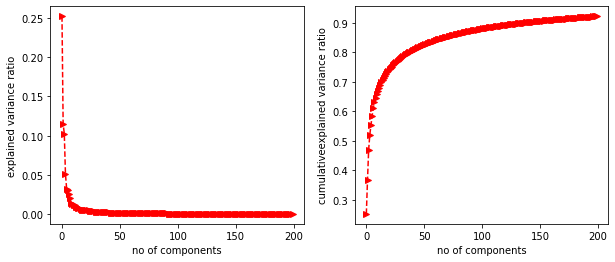

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no of components')
plt.ylabel('explained variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no of components')
plt.ylabel('cumulativeexplained variance ratio')
plt.plot(eigen_ratio_sum[:200],'r>--')
plt.show()

In [17]:
pca_50 = PCA(n_components=50, whiten=True, svd_solver='auto') 
x_pca_50=pca_50.fit_transform(x1)

In [18]:
x_pca_50.shape

(5459, 50)

In [23]:
import pickle
pickle.dump(pca_50,open('./model/pca_50.pickle','wb'))

In [24]:
np.savez("./data/data_pca_50_y_mean.pickle",x_pca_50,y,x.mean(axis=0))